# HydroML
HydroML is a machine learning endeavor focused on predicting Dissolved Oxygen levels in water by exploring various model types. The dataset utilized in this research was obtained from the publicly accessible IEEE website.

In this study, we aim to assess the effectiveness and practicality of hybrid ML models against Deep Learning neural networks, seeking insights into their suitability and functionality.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv(r'/content/HK.csv')
df.head()

,NH3,Turbidity,P,N,KjeN,Inor N,Temp,D,Salinity,PH,Fecal,Ecoli,DO,COD,Chlo A,BOD
0,0.006067,1.726667,0.142667,1.076000,0.952667,0.400667,18.886667,2.160000,31.546667,7.853333,3960.000000,2840.000000,5.740000,74.800000,2.160000,0.600000
1,0.006595,2.452381,0.163810,0.968095,0.864048,0.381667,17.392857,2.300000,31.540476,7.980952,4047.619048,3307.142857,5.559524,70.380952,1.559524,0.721429
2,0.006000,3.763158,0.132105,0.456316,0.357368,0.314737,16.989474,2.568421,31.710526,8.115789,4526.315790,3710.526316,5.626316,70.526316,1.768421,0.868421
3,0.005571,3.700000,0.090000,0.767143,0.722857,0.252857,20.585714,3.100000,32.385714,7.942857,11428.571430,8342.857143,5.271429,71.142857,2.514286,0.700000
4,0.004286,5.192857,0.082857,1.375000,1.189286,0.410714,23.400000,2.292857,29.642857,7.707143,22928.571430,16928.571430,4.614286,64.714286,2.635714,0.771429


In [3]:
df2 = df.copy()

In [4]:
df2.shape

(2400, 16)

## Feature Selection
The datset consist of 16 features and using too many features will complicate the modelling task. So, we will first create a basic model and select the features based on feature importance

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X = df2.drop(['DO'], axis='columns')  # input
y = df2['DO']

# Convert X and y to dataframes
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)


(1680, 15)
(720, 15)


We will use most commonly used RF and XGBoost to create the rudimentary model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
# Assuming X_train, X_test, y_train, and y_test are your training and testing data

# RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
rf_valscore = cross_val_score(rf_clf, X_train, y_train, cv=5).mean()
rf_score = cross_val_score(rf_clf, X_test, y_test, cv=5).mean()
# Initialize XGBoost regressor
xgb_clf = XGBRegressor()
xgb_clf.fit(X_train, y_train)
xgb_valscore = cross_val_score(xgb_clf, X_train, y_train, cv=5).mean()
xgb_score = cross_val_score(rf_clf, X_test, y_test, cv=5).mean()


# Print scores
print("RandomForestRegressor Validation score:", rf_valscore)
print("RandomForestRegressor score:", rf_score)
print("RandomForestRegressor Validation score:", xgb_valscore)
print("Xtreme GradientBoostingRegressor score:", xgb_score)



RandomForestRegressor Validation score: 0.9826793653145046
RandomForestRegressor score: 0.9789458505384967
RandomForestRegressor Validation score: 0.9832267544473167
Xtreme GradientBoostingRegressor score: 0.9785573946365697


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Train RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Calculate feature importances
feature_importance = rf.feature_importances_

# Get column names from the original DataFrame
column_names = X_train_df.columns

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print feature importances with names
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. Feature: {column_names[idx]}, Importance: {feature_importance[idx]}")


1. Feature: COD, Importance: 0.8818748728581589
2. Feature: Temp, Importance: 0.09976178297582465
3. Feature: Salinity, Importance: 0.004987122076998903
4. Feature: KjeN, Importance: 0.001975177512586828
5. Feature: NH3, Importance: 0.0017080603409333037
6. Feature: BOD, Importance: 0.0015483079347640748
7. Feature: N, Importance: 0.0013028933201654185
8. Feature: Chlo A, Importance: 0.0012032142785149277
9. Feature: Turbidity, Importance: 0.0010928656258065305
10. Feature: P, Importance: 0.001092648339866763
11. Feature: Inor N, Importance: 0.0009234504913045301
12. Feature: PH, Importance: 0.0008729036222939733
13. Feature: D, Importance: 0.0006943928642326384
14. Feature: Fecal, Importance: 0.0005400826199610122
15. Feature: Ecoli, Importance: 0.0004222251385874781


In [9]:
import pandas as pd
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Convert X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Calculate feature importances
feature_importance = xgb_model.feature_importances_

# Get column names from the original DataFrame
column_names = X_train_df.columns

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Print feature importances with names
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. Feature: {column_names[idx]}, Importance: {feature_importance[idx]}")


1. Feature: COD, Importance: 0.8716332912445068
2. Feature: Temp, Importance: 0.10597298294305801
3. Feature: Salinity, Importance: 0.008950237184762955
4. Feature: KjeN, Importance: 0.002457516035065055
5. Feature: P, Importance: 0.001649042940698564
6. Feature: N, Importance: 0.0015820958651602268
7. Feature: Inor N, Importance: 0.0013822432374581695
8. Feature: BOD, Importance: 0.0013506165705621243
9. Feature: Chlo A, Importance: 0.001127894502133131
10. Feature: NH3, Importance: 0.0011218530125916004
11. Feature: Turbidity, Importance: 0.0009450516663491726
12. Feature: PH, Importance: 0.0006959800375625491
13. Feature: D, Importance: 0.0004493824962992221
14. Feature: Fecal, Importance: 0.0004191382904537022
15. Feature: Ecoli, Importance: 0.0002626479836180806


In both cases COD and Temp seems to be the most impactful parameter.
So we will only use COD and Temp for the modelling

In [3]:
df = df[['COD','DO','Temp']]

In [4]:
df.shape

(2400, 3)

In [31]:
df.head()

,COD,DO,Temp
0,74.800000,5.740000,18.886667
1,70.380952,5.559524,17.392857
2,70.526316,5.626316,16.989474
3,71.142857,5.271429,20.585714
4,64.714286,4.614286,23.400000


# ML vs DL

Normally ML models performs better with less amount of data compared to DL models. To asses this axiom we will divide the dataset into 5 section from small to large (the frist section will have least data and sequencially well will increase this data). Then we will use this 5 subsets for prediction using DL and ML and see how they respond

In [5]:
sections = []
section_sizes = [480, 480, 480, 480, 480]

start_index = 0
for i, size in enumerate(section_sizes, start=1):
    section_name = f"s{i}"
    globals()[section_name] = df.iloc[start_index:start_index+size].copy()
    start_index += size


In [6]:
df1 = s1.copy()
df1.shape

(480, 3)

In [7]:
df1.head()

,COD,DO,Temp
0,74.800000,5.740000,18.886667
1,70.380952,5.559524,17.392857
2,70.526316,5.626316,16.989474
3,71.142857,5.271429,20.585714
4,64.714286,4.614286,23.400000


In [8]:
df2 = pd.concat([s1, s2]).copy()
df2.shape

(960, 3)

In [22]:
df2.head()

,COD,DO,Temp
0,74.800000,5.740000,18.886667
1,70.380952,5.559524,17.392857
2,70.526316,5.626316,16.989474
3,71.142857,5.271429,20.585714
4,64.714286,4.614286,23.400000


In [9]:
df3 = pd.concat([s1, s2, s3]).copy()
df3.shape

(1440, 3)

In [10]:
df4 = pd.concat([s1, s2, s3, s4]).copy()
df4.shape

(1920, 3)

In [11]:
df5 = pd.concat([s1, s2, s3, s4, s5]).copy()
df5.shape

(2400, 3)

In [78]:
df1.shape

(480, 3)

# With COD and temp

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X1 = df1.drop(['DO','Temp'], axis='columns')  # input
y1 = df1['DO']

# Convert X and y to dataframes
X1 = pd.DataFrame(X1)
y1 = pd.DataFrame(y1)

# Scaling the features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.3, random_state=10)

print(X1_train.shape)
print(X1_test.shape)


(336, 1)
(144, 1)


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X2 = df2.drop(['DO'], axis='columns')  # input
y2 = df2['DO']

# Convert X and y to dataframes
X2 = pd.DataFrame(X2)
y2 = pd.DataFrame(y2)

# Scaling the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=10)

print(X2_train.shape)
print(X2_test.shape)


(672, 2)
(288, 2)


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X3 = df3.drop(['DO'], axis='columns')  # input
y3 = df3['DO']

# Convert X and y to dataframes
X3 = pd.DataFrame(X3)
y3 = pd.DataFrame(y3)

# Scaling the features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Splitting the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.3, random_state=10)

print(X3_train.shape)
print(X3_test.shape)


(1008, 2)
(432, 2)


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X4 = df4.drop(['DO'], axis='columns')  # input
y4 = df4['DO']

# Convert X and y to dataframes
X4 = pd.DataFrame(X4)
y4 = pd.DataFrame(y4)

# Scaling the features
scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

# Splitting the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4, test_size=0.3, random_state=10)

print(X4_train.shape)
print(X4_test.shape)


(1344, 2)
(576, 2)


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X5 = df5.drop(['DO'], axis='columns')  # input
y5 = df5['DO']

# Convert X and y to dataframes
X5 = pd.DataFrame(X5)
y5 = pd.DataFrame(y5)

# Scaling the features
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)

# Splitting the data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_scaled, y5, test_size=0.3, random_state=10)

print(X5_train.shape)
print(X5_test.shape)


(1680, 2)
(720, 2)


# ML1

In [20]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize models
rf_clf = RandomForestRegressor()
xgb_clf = XGBRegressor()

# Dictionary to store scores
scores = {}

# Loop through each train-test split
for i in range(1, 6):  # assuming you have 5 train-test splits
    # Accessing the arrays directly
    X_train = globals()[f"X{i}_train"]  # Assuming X1_train, X2_train, X3_train, etc., are already defined
    X_test = globals()[f"X{i}_test"]
    y_train = globals()[f"y{i}_train"].values.ravel()
    y_test = globals()[f"y{i}_test"].values.ravel()

    # Fit and evaluate RandomForestRegressor
    rf_clf.fit(X_train, y_train)
    rf_valscore = cross_val_score(rf_clf, X_train, y_train, cv=5).mean()
    rf_score = cross_val_score(rf_clf, X_test, y_test, cv=5).mean()

    # Fit and evaluate XGBRegressor
    xgb_clf.fit(X_train, y_train)
    xgb_valscore = cross_val_score(xgb_clf, X_train, y_train, cv=5).mean()
    xgb_score = cross_val_score(xgb_clf, X_test, y_test, cv=5).mean()

    # Store scores
    scores[f"RF_split{i}"] = (rf_valscore, rf_score)
    scores[f"XGB_split{i}"] = (xgb_valscore, xgb_score)

# Print scores
for key, value in scores.items():
    print(key, "Validation score:", value[0], "Test score:", value[1])


RF_split1 Validation score: 0.9624569312304967 Test score: 0.9198631361146535
XGB_split1 Validation score: 0.9570577813717567 Test score: 0.9283274732558988
RF_split2 Validation score: 0.9688870934325425 Test score: 0.9625462862982512
XGB_split2 Validation score: 0.9652628623269802 Test score: 0.9580468996750243
RF_split3 Validation score: 0.9727617515171934 Test score: 0.9658736380824212
XGB_split3 Validation score: 0.9698500750520674 Test score: 0.9620864907524185
RF_split4 Validation score: 0.9736143326819887 Test score: 0.9789277449746333
XGB_split4 Validation score: 0.9673398528150461 Test score: 0.9766024301500664
RF_split5 Validation score: 0.9783621459118221 Test score: 0.9797966878927168
XGB_split5 Validation score: 0.9750067630771305 Test score: 0.9751103646320123


In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Define base estimators
base_estimators = [
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("MLPRegressor", MLPRegressor())
]

# Initialize StackingRegressor with base estimators and final estimator
stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=LinearRegression()
)

# Dictionary to store scores
scores = {}

# Loop through each train-test split
for i in range(1, 6):  # assuming you have 5 train-test splits
    # Accessing the arrays directly
    X_train = globals()[f"X{i}_train"]  # Assuming X1_train, X2_train, X3_train, etc., are already defined
    X_test = globals()[f"X{i}_test"]
    y_train = globals()[f"y{i}_train"].values.ravel()
    y_test = globals()[f"y{i}_test"].values.ravel()


    # Perform cross-validation on training data with StackingRegressor
    cv_stacked_train = cross_val_score(stacked_model, X_train, y_train, cv=5)
    cv_stacked_test = cross_val_score(stacked_model, X_test, y_test, cv=5)

    # Store scores
    scores[f"Stacked_split{i}"] = (cv_stacked_train.mean(), cv_stacked_test.mean())

# Print scores
for key, value in scores.items():
    print(key, "Validation score:", value[0], "Test score:", value[1])


Stacked_split1 Validation score: 0.9675020319556819 Test score: 0.9330727422689735
Stacked_split2 Validation score: 0.9753062776336542 Test score: 0.9627030560126275
Stacked_split3 Validation score: 0.9801534934081862 Test score: 0.9696711557512309
Stacked_split4 Validation score: 0.9776747631972611 Test score: 0.981027444219864
Stacked_split5 Validation score: 0.9805360080957197 Test score: 0.9823886794071383


In [ ]:
# Certainly! Here are the scores rounded to three decimal places:

# - Stacked_split1 Validation score: 0.967 Test score: 0.936
# - Stacked_split2 Validation score: 0.975 Test score: 0.964
# - Stacked_split3 Validation score: 0.980 Test score: 0.970
# - Stacked_split4 Validation score: 0.978 Test score: 0.981
# - Stacked_split5 Validation score: 0.980 Test score: 0.982

# DL

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation = 'relu',input_dim = X1_train.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X1_train, y1_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)
y_pred = model.predict(X1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y1_pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation = 'relu',input_dim = X2_train.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X2_train, y2_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)

y2_pred = model.predict(X2_test)
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               768       
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
54/54

0.9783034069084795

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X3_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X3_train, y3_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y3_pred = model.predict(X3_test)
from sklearn.metrics import r2_score
r2_score(y3_test, y3_pred)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               768       
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
81/81

0.9768150464959832

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X4_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X4_train, y4_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y4_pred = model.predict(X4_test)
from sklearn.metrics import r2_score
r2_score(y4_test, y4_pred)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               768       
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
108/1

0.9667668055146504

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X5_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X5_train, y5_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y5_pred = model.predict(X5_test)
from sklearn.metrics import r2_score
r2_score(y5_test, y5_pred)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               768       
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
135/1

0.9778708943187254

# With only COD

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X1 = df1.drop(['DO','Temp'], axis='columns')  # input
y1 = df1['DO']

# Convert X and y to dataframes
X1 = pd.DataFrame(X1)
y1 = pd.DataFrame(y1)

# Scaling the features
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.3, random_state=10)

print(X1_train.shape)
print(X1_test.shape)


(336, 1)
(144, 1)


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X2 = df2.drop(['DO','Temp'], axis='columns')  # input
y2 = df2['DO']

# Convert X and y to dataframes
X2 = pd.DataFrame(X2)
y2 = pd.DataFrame(y2)

# Scaling the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=10)

print(X2_train.shape)
print(X2_test.shape)


(672, 1)
(288, 1)


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X3 = df3.drop(['DO','Temp'], axis='columns')  # input
y3 = df3['DO']

# Convert X and y to dataframes
X3 = pd.DataFrame(X3)
y3 = pd.DataFrame(y3)

# Scaling the features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Splitting the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.3, random_state=10)

print(X3_train.shape)
print(X3_test.shape)


(1008, 1)
(432, 1)


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X4 = df4.drop(['DO','Temp'], axis='columns')  # input
y4 = df4['DO']

# Convert X and y to dataframes
X4 = pd.DataFrame(X4)
y4 = pd.DataFrame(y4)

# Scaling the features
scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

# Splitting the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4, test_size=0.3, random_state=10)

print(X4_train.shape)
print(X4_test.shape)


(1344, 1)
(576, 1)


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df1' contains your dataframe
X5 = df5.drop(['DO','Temp'], axis='columns')  # input
y5 = df5['DO']

# Convert X and y to dataframes
X5 = pd.DataFrame(X5)
y5 = pd.DataFrame(y5)

# Scaling the features
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)

# Splitting the data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_scaled, y5, test_size=0.3, random_state=10)

print(X5_train.shape)
print(X5_test.shape)


(1680, 1)
(720, 1)


# ML2

In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Initialize models
rf_clf = RandomForestRegressor()
xgb_clf = XGBRegressor()

# Dictionary to store scores
scores = {}

# Loop through each train-test split
for i in range(1, 6):  # assuming you have 5 train-test splits
    # Accessing the arrays directly
    X_train = globals()[f"X{i}_train"]  # Assuming X1_train, X2_train, X3_train, etc., are already defined
    X_test = globals()[f"X{i}_test"]
    y_train = globals()[f"y{i}_train"].values.ravel()
    y_test = globals()[f"y{i}_test"].values.ravel()

    # Fit and evaluate RandomForestRegressor
    rf_clf.fit(X_train, y_train)
    rf_valscore = cross_val_score(rf_clf, X_train, y_train, cv=5).mean()
    rf_score = cross_val_score(rf_clf, X_test, y_test, cv=5).mean()

    # Fit and evaluate XGBRegressor
    xgb_clf.fit(X_train, y_train)
    xgb_valscore = cross_val_score(xgb_clf, X_train, y_train, cv=5).mean()
    xgb_score = cross_val_score(xgb_clf, X_test, y_test, cv=5).mean()

    # Store scores
    scores[f"RF_split{i}"] = (rf_valscore, rf_score)
    scores[f"XGB_split{i}"] = (xgb_valscore, xgb_score)

# Print scores
for key, value in scores.items():
    print(key, "Validation score:", value[0], "Test score:", value[1])


RF_split1 Validation score: 0.7651121225483063 Test score: 0.8348764859574395
XGB_split1 Validation score: 0.7196799145853786 Test score: 0.7913712315144632
RF_split2 Validation score: 0.8273197008144674 Test score: 0.8245575606160159
XGB_split2 Validation score: 0.8278327596673701 Test score: 0.7714901709198444
RF_split3 Validation score: 0.802334788648779 Test score: 0.8109431432953397
XGB_split3 Validation score: 0.822000143910788 Test score: 0.795404204719966
RF_split4 Validation score: 0.8014289297484568 Test score: 0.8557531429518453
XGB_split4 Validation score: 0.834676910959303 Test score: 0.8500842691099579
RF_split5 Validation score: 0.821975325977905 Test score: 0.8117224013089714
XGB_split5 Validation score: 0.8471096612564579 Test score: 0.8274360222836072


In [39]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Define base estimators
base_estimators = [
    ("RandomForestRegressor", RandomForestRegressor()),
    ("XGBoostRegressor", XGBRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("MLPRegressor", MLPRegressor())
]

# Initialize StackingRegressor with base estimators and final estimator
stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=LinearRegression()
)

# Dictionary to store scores
scores = {}

# Loop through each train-test split
for i in range(1, 6):  # assuming you have 5 train-test splits
    # Accessing the arrays directly
    X_train = globals()[f"X{i}_train"]  # Assuming X1_train, X2_train, X3_train, etc., are already defined
    X_test = globals()[f"X{i}_test"]
    y_train = globals()[f"y{i}_train"].values.ravel()
    y_test = globals()[f"y{i}_test"].values.ravel()


    # Perform cross-validation on training data with StackingRegressor
    cv_stacked_train = cross_val_score(stacked_model, X_train, y_train, cv=5)
    cv_stacked_test = cross_val_score(stacked_model, X_test, y_test, cv=5)

    # Store scores
    scores[f"Stacked_split{i}"] = (cv_stacked_train.mean(), cv_stacked_test.mean())

# Print scores
for key, value in scores.items():
    print(key, "Validation score:", value[0], "Test score:", value[1])


Stacked_split1 Validation score: 0.8281332471504413 Test score: 0.8414437439513611
Stacked_split2 Validation score: 0.8645649543922846 Test score: 0.8389242450299589
Stacked_split3 Validation score: 0.8625714089370952 Test score: 0.8577896633623645
Stacked_split4 Validation score: 0.8587023808474884 Test score: 0.8785699130708163
Stacked_split5 Validation score: 0.8640449701351116 Test score: 0.8661811563435873


# DL2

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation = 'relu',input_dim = X1_train.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X1_train, y1_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)
y1_pred = model.predict(X1_test)
from sklearn.metrics import r2_score
r2_score(y1_test, y1_pred)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               512       
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43777 (171.00 KB)
Trainable params: 43777 (171.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
27/27

0.8584414934931505

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation = 'relu',input_dim = X2_train.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X2_train, y2_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)

y2_pred = model.predict(X2_test)
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               512       
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43777 (171.00 KB)
Trainable params: 43777 (171.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
54/54

0.8610552282153408

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X3_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X3_train, y3_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y3_pred = model.predict(X3_test)
from sklearn.metrics import r2_score
r2_score(y3_test, y3_pred)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               512       
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43777 (171.00 KB)
Trainable params: 43777 (171.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
81/81

0.8722212272588785

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X4_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X4_train, y4_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y4_pred = model.predict(X4_test)
from sklearn.metrics import r2_score
r2_score(y4_test, y4_pred)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               512       
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43777 (171.00 KB)
Trainable params: 43777 (171.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
108/1

0.8806889293552737

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X5_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X5_train, y5_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

y5_pred = model.predict(X5_test)
from sklearn.metrics import r2_score
r2_score(y5_test, y5_pred)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               512       
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43777 (171.00 KB)
Trainable params: 43777 (171.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
135/

0.8574037202600259

In [ ]:
# 	RF	XGB	Hybrid	DL
# Split 1	0.92	0.962	0.933	0.983
# Split 2	0.928	0.979	0.963	0.978
# Split 3	0.963	0.977	0.969	0.966
# Split 4	0.958	0.98	0.981	0.978
# Split 5	0.966	0.975	0.982	0.977


# With COD only
# 	0.835	0.791	0.841	0.858
# 	0.825	0.771	0.839	0.861
# 	0.811	0.795	0.858	0.872
# 	0.856	0.85	0.879	0.88
# 	0.812	0.827	0.866	0.857


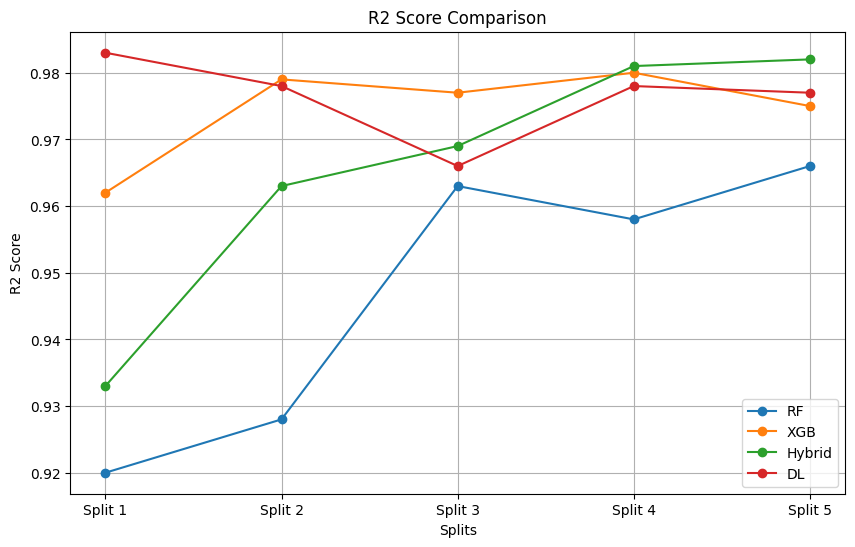

In [47]:
import matplotlib.pyplot as plt

# Data
splits = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5']
RF_scores = [0.92, 0.928, 0.963, 0.958, 0.966]
XGB_scores = [0.962, 0.979, 0.977, 0.98, 0.975]
Hybrid_scores = [0.933, 0.963, 0.969, 0.981, 0.982]
DL_scores = [0.983, 0.978, 0.966, 0.978, 0.977]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(splits, RF_scores, marker='o', label='RF')
plt.plot(splits, XGB_scores, marker='o', label='XGB')
plt.plot(splits, Hybrid_scores, marker='o', label='Hybrid')
plt.plot(splits, DL_scores, marker='o', label='DL')

# Add labels and title
plt.xlabel('Splits')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


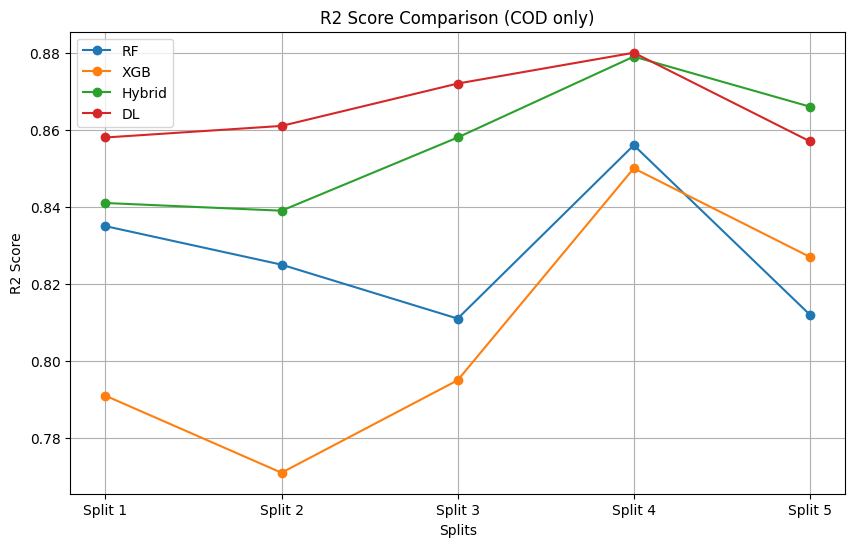

In [48]:
import matplotlib.pyplot as plt

# Data
splits = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5']
RF_scores = [0.835, 0.825, 0.811, 0.856, 0.812]
XGB_scores = [0.791, 0.771, 0.795, 0.85, 0.827]
Hybrid_scores = [0.841, 0.839, 0.858, 0.879, 0.866]
DL_scores = [0.858, 0.861, 0.872, 0.88, 0.857]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(splits, RF_scores, marker='o', label='RF')
plt.plot(splits, XGB_scores, marker='o', label='XGB')
plt.plot(splits, Hybrid_scores, marker='o', label='Hybrid')
plt.plot(splits, DL_scores, marker='o', label='DL')

# Add labels and title
plt.xlabel('Splits')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison (COD only)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


### Project Overview

The objective of this project was to evaluate the performance of different machine learning (ML), hybrid ML, and deep learning (DL) models in predicting dissolved oxygen (DO) levels using varying amounts of data and different input features. The study was conducted in two phases:

1. **Using COD and Temperature as Inputs:**
   - Models: Random Forest (RF), XGBoost (XGB), Hybrid Model (combining ML techniques), and Deep Learning (DL).
   - Data splits: Five splits with increasing amounts of data (1/5 to 5/5).

2. **Using COD Only as Input:**
   - Models: RF, XGB, Hybrid Model, and DL.
   - Data splits: Same five splits as in the first phase.

### Phase 1: Using COD and Temperature as Inputs

**Results:**
- **Random Forest (RF):** Performance improved steadily with more data, peaking at the fifth split.
- **XGBoost (XGB):** Showed the highest performance in the second split but remained consistently high across all splits.
- **Hybrid Model:** Performance improved significantly with more data, showing the highest score in the fifth split.
- **Deep Learning (DL):** Performance was highest in the first split, then stabilized slightly lower but consistently good.

**Analysis:**
- **Consistency:** XGBoost and DL models exhibited more consistent performance across different data splits compared to RF and the Hybrid model.
- **Sensitivity to Data Size:** RF showed the greatest improvement with increasing data, suggesting it benefits more from larger datasets.
- **Peak Performance:** DL and XGB had the highest initial performance, indicating their robustness even with smaller datasets.

### Phase 2: Using COD Only as Input

**Results:**
- **Random Forest (RF):** Performance fluctuated with a general decrease compared to using both inputs.
- **XGBoost (XGB):** Performance decreased significantly when temperature was removed, showing more variability.
- **Hybrid Model:** Maintained relatively high performance, with slight improvement in higher splits.
- **Deep Learning (DL):** Maintained the highest consistency and overall performance, similar to the hybrid model but slightly better.

**Analysis:**
- **Feature Sensitivity:** Removing temperature as an input negatively impacted all models, with RF and XGB experiencing the most significant drops.
- **Model Robustness:** DL and the Hybrid model were more robust to the reduced feature set, maintaining higher performance levels.
- **Data Utilization:** Despite the reduced feature set, increasing the data size still benefited all models, indicating the importance of data volume.

### Conclusions

1. **Model Performance:**
   - **Deep Learning:** Consistently outperformed other models in both phases, showing robustness to both data volume and feature set changes.
   - **XGBoost:** High performance with all features, but more sensitive to feature reduction.
   - **Random Forest:** Benefited significantly from larger datasets but was more affected by feature reduction.
   - **Hybrid Model:** Showed a balanced performance, improving significantly with more data and maintaining robustness with fewer features.

2. **Impact of Data Volume:**
   - Increasing the amount of data generally improved model performance across all types, especially for RF and the Hybrid model.

3. **Impact of Feature Set:**
   - The inclusion of temperature as a feature significantly improved prediction accuracy. Removing temperature reduced the performance of all models, highlighting the importance of comprehensive feature selection.


This assessment provides a clear understanding of how different models respond to changes in data volume and feature sets, guiding future efforts in model selection and data collection strategies for predicting dissolved oxygen levels.


## Optimization of DL

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_dim=X_train.shape[1]))

    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner'
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

best_model.summary()


Trial 5 Complete [00h 00m 14s]
val_mean_absolute_error: 0.08092322200536728

Best val_mean_absolute_error So Far: 0.07375294466813405
Total elapsed time: 00h 01m 13s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               1344      
                                                                 
 dense_1 (Dense)             (None, 320)               143680    
                                                                 
 dense_2 (Dense)             (None, 160)               51360     
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 196545 (767.75 KB)
Trainable params: 196545 (767.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(448, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(320, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)


y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 448)               1344      
                                                                 
 dense_5 (Dense)             (None, 320)               143680    
                                                                 
 dense_6 (Dense)             (None, 160)               51360     
                                                                 
 dense_7 (Dense)             (None, 1)                 161       
                                                                 
Total params: 196545 (767.75 KB)
Trainable params: 196545 (767.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# In Depth Analysis

## SHAP

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import shap

# RandomForestRegressor Shapley Analysis
rf_explainer = shap.Explainer(rf_clf, X_train)
rf_shap_values = rf_explainer.shap_values(X_test)

# XGBRegressor Shapley Analysis
xgb_explainer = shap.Explainer(xgb_clf, X_train)
xgb_shap_values = xgb_explainer.shap_values(X_test)

# ANN Shapley Analysis
ann_explainer = shap.Explainer(model, X_train)
ann_shap_values = ann_explainer.shap_values(X_test)


PermutationExplainer explainer: 721it [00:29, 22.09it/s]                         


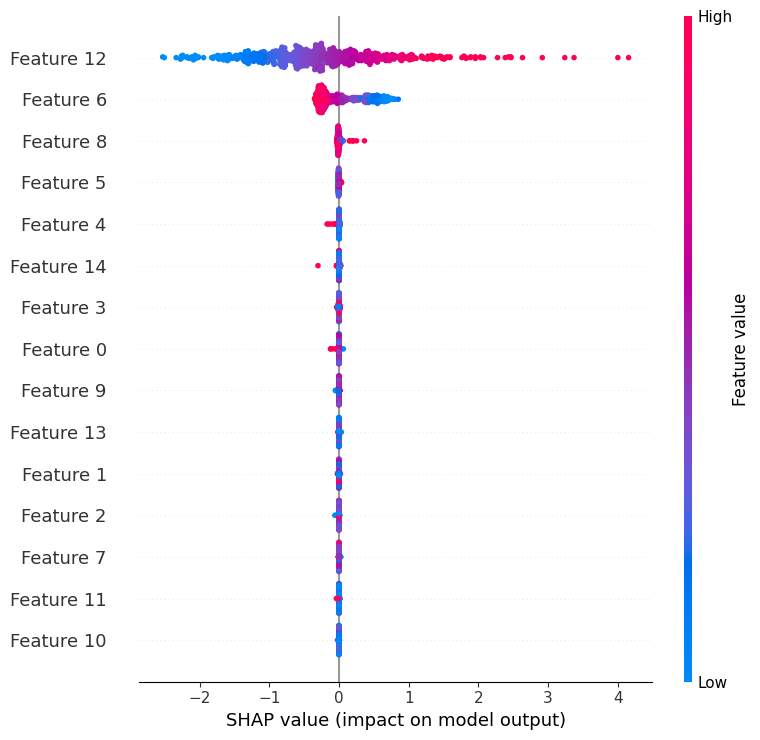

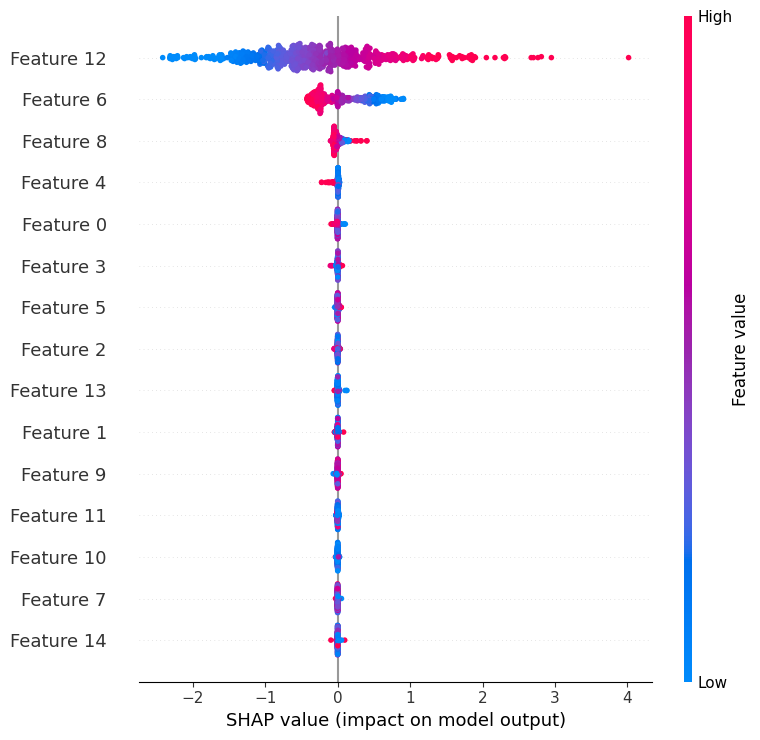

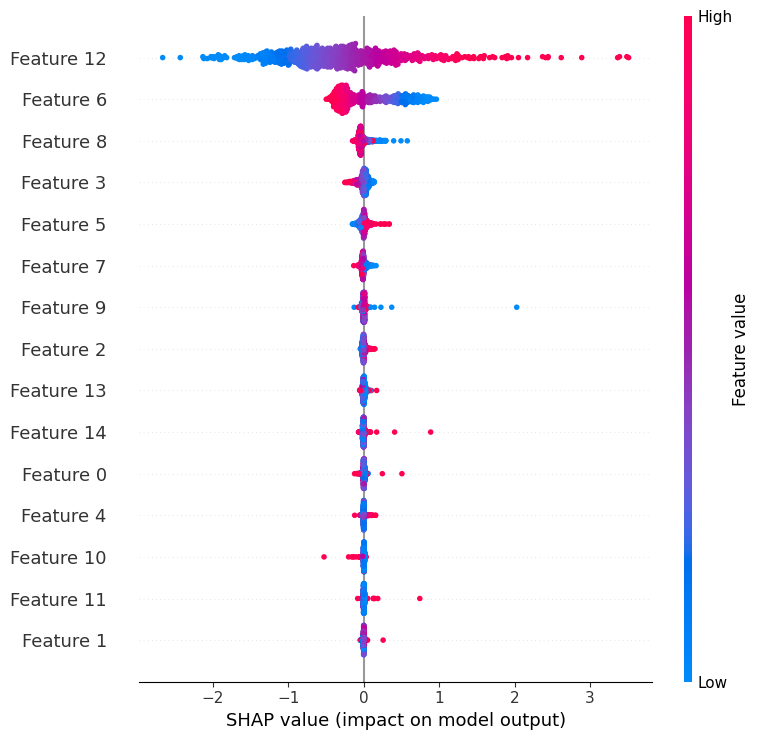

In [ ]:

# RandomForestRegressor Shapley summary beeswarm plot
shap.summary_plot(rf_shap_values, X_test, plot_type="dot")

# XGBRegressor Shapley summary beeswarm plot
shap.summary_plot(xgb_shap_values, X_test, plot_type="dot")

# ANN Shapley summary beeswarm plot
shap.summary_plot(ann_shap_values, X_test, plot_type="dot")

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e0246f6a87824263d43a1ac3cc8ed1e976b1d1328f056d9a2c5c42dd272e3d5e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
X.columns

Index(['NH3', 'Turbidity', 'P', 'N', 'KjeN', 'Inor N', 'Temp', 'D', 'Salinity',
       'PH', 'Fecal', 'Ecoli', 'COD', 'Chlo A', 'BOD'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
# Assuming X_train, X_test, y_train, and y_test are your training and testing data

# RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X, y)


# Initialize XGBoost regressor
xgb_clf = XGBRegressor()
xgb_clf.fit(X, y)

model.compile(optimizer='Adam', loss='mean_squared_error')
history = model.fit(X, y, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)



Epoch 1/50
192/192 [==============================] - 3s 6ms/step - loss: 63758.0586 - val_loss: 27.0975
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 95.5661 - val_loss: 18.7636
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 28.8602 - val_loss: 70.9779
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 20.9974 - val_loss: 14.2091
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 19.0981 - val_loss: 11.3697
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 6.7493 - val_loss: 6.0158
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 9.2628 - val_loss: 2.4855
Epoch 8/50
192/192 [==============================] - 1s 4ms/step - loss: 12.2856 - val_loss: 14.4726
Epoch 9/50
192/192 [==============================] - 1s 4ms/step - loss: 13.8447 - val_loss: 5.6822
Epoch 10/50
192/192 [==============================] - 1s 4ms/step - loss: 8.4822 - 

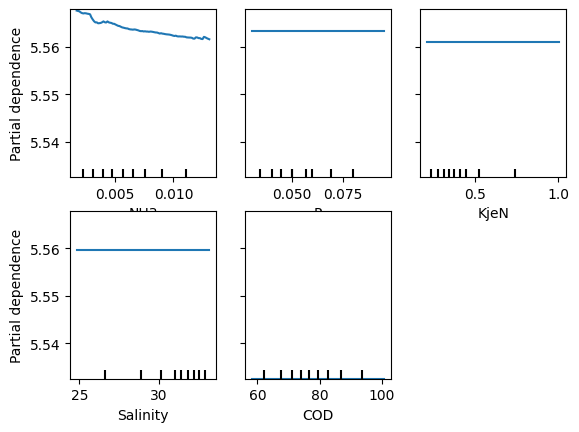

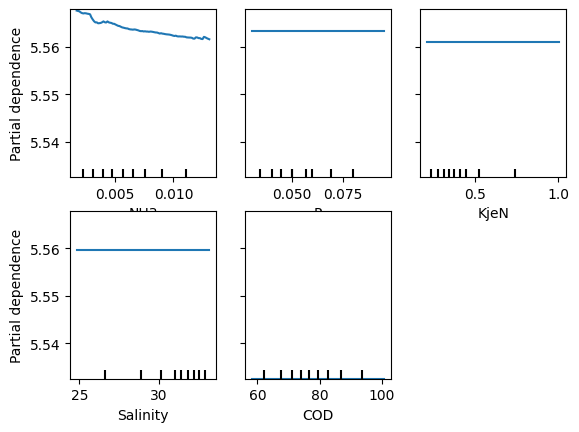

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'model' is your trained model
# Assuming 'X' is your feature dataframe
features_to_visualize = [X.columns[i] for i in [0, 2, 4, 8, 12]]
X_subset = X.iloc[:, [0, 2, 4, 8, 12]]

display = PartialDependenceDisplay.from_estimator(rf_clf, X_subset, features=features_to_visualize)
display.plot()


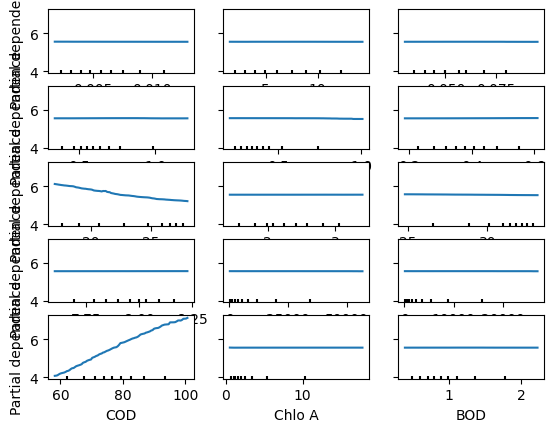

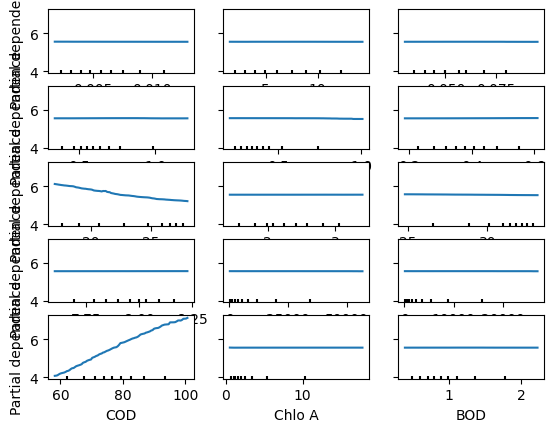

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'model' is your trained model
# Assuming 'X' is your feature dataframe
features = X.columns
display = PartialDependenceDisplay.from_estimator(rf_clf, X, features)
display.plot()


In [ ]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt

# Assuming model is your trained machine learning model
# Assuming X_train is your training data

# Create a PDP for a single feature
feature_to_plot = 'feature_name'  # Replace 'feature_name' with the feature you want to plot

# Create the data for plotting
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_train, model_features=X_train.columns, feature=feature_to_plot)

# Plot it
pdp.pdp_plot(pdp_goals, feature_to_plot)
plt.show()


KeyError: 44

In [ ]:
# X = df3.drop(['DO'],axis='columns')   #input
# y = df3['DO']

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
# print(X_train.shape)
# print(X_test.shape)

# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# # Assuming X_train, X_test, y_train, and y_test are your training and testing data

# # RandomForestRegressor
# rf_clf = RandomForestRegressor()
# rf_clf.fit(X_train, y_train)
# rf_score = rf_clf.score(X_test, y_test)

# # Initialize XGBoost regressor
# xgb_clf = XGBRegressor()
# xgb_clf.fit(X_train, y_train)
# xgb_score = xgb_clf.score(X_test, y_test)


# # Print scores
# print("RandomForestRegressor score:", rf_score)
# print("Xtreme GradientBoostingRegressor score:", xgb_score)


# import tensorflow
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
# model = Sequential()
# model.add(Dense(416, activation = 'relu',input_dim = X_train.shape[1]))
# model.add(Dense(416, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(1, activation = 'linear'))
# model.summary()


# model.compile(optimizer='Adam', loss='mean_squared_error')
# history = model.fit(X_train, y_train, epochs = 50, batch_size = 10, verbose = 1, validation_split=0.2)

# y_pred = model.predict(X_test)
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)